# In this notebook, I'll analyze a credit card dataset from UCI datasets, and moon dataset.

## Main idea is to use and clarify when to use different cluster techniques according to a specific dataset.

## KMeans,Hierarchical Clustering, DBscan

- Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# K-means

## Credit card dataset - 2 features ( x and y axis ):

## Limit and Total Bill


In [3]:
%%time
import pandas as pd
base_cartao = pd.read_csv('/content/credit_card_clients.csv', header = 1)
base_cartao

CPU times: user 91.1 ms, sys: 22.4 ms, total: 114 ms
Wall time: 127 ms


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [4]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

In [5]:
base_cartao

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         -1  ...          0          0         0       689         0   
1          0  ...       3455       3261         0      1000      1000   
2          0  ...      14948      15549      1518      1500      1000   
3          0  ...      28959      29547      2000      2019      1200   
4          0  ...      19146      19131      2000     36681     10000   
...      ...  ...        ...        ...       ...       ...       ...   
29995      0  ...      31237      15980      8500     20000      5003   
29996     -1  ...       5190          0      1837      3526      8998   
29997     -1  ...      20582      19357         0         0     22000   
29998      0  ...      11855      48944     85900      3409      1178   
29999      0  ...      32428      15313      2078      1800      1430   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  BILL_TOTAL  
0             0         0         0                           1        7704  
1          1000         0      2000                           1       17077  
2          1000      1000      5000                           0      101653  
3          1100      1069      1000                           0      231334  
4          9000       689       679                           0      109339  
...         ...       ...       ...                         ...         ...  
29995      3047      5000      1000                           0      725349  
29996       129         0         0                           0       21182  
29997      4200      2000      3100                           1       70496  
29998      1926     52964      1804                           1      266611  
29999      1000      1000      1000                           1      230874  

[30000 rows x 26 columns]

In [6]:
#Selecting the LIMIT and TOTAL BILL array values
X_cartao = base_cartao.iloc[:, [1, 25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [7]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)

In [8]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [9]:
#Creating the wcss vs number of cluster vision- to analyze ideal number of clusters!
wcss = []
for i in range(1, 11):
  #print(i)
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
wcss

[59999.99999999978,
 35196.57080583435,
 20128.132558347686,
 14943.809173865899,
 10707.537016753624,
 8603.395384848965,
 7400.069599689482,
 6353.473303353463,
 5665.823857740179,
 5052.188166408734]

In [11]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [14]:
#Checking the n_clusters=3
kmeans_cartao = KMeans(n_clusters=3, random_state=0)
rotulosss = kmeans_cartao.fit_predict(X_cartao)

np.unique(rotulosss,return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(array([0, 1, 2], dtype=int32), array([18137,  3525,  8338]))

In [15]:
#Checking the n_clusters = 4
kmeans_cartao = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao)

np.unique(rotulos,return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(array([0, 1, 2, 3], dtype=int32), array([16389,  7970,  1258,  4383]))

In [13]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color=rotulos)
grafico.show()

In [ ]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [     2, 120000,      2, ...,      1,  17077,      0],
       [     3,  90000,      2, ...,      0, 101653,      0],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 30000,  50000,      1, ...,      1, 230874,      0]])

In [ ]:
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16789,  30000,      1, ...,      1,  14274,      0],
       [ 16788,  30000,      1, ...,      1,  90453,      0],
       ...,
       [ 20882, 110000,      1, ...,      0, 554308,      3],
       [ 20744, 220000,      1, ...,      0, 452961,      3],
       [ 20270, 150000,      2, ...,      0, 546939,      3]])

## Credit card dataset - Using more than 2 features to analyze clusters

In [ ]:
base_cartao.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_TOTAL'],
      dtype='object')

In [ ]:
X_cartao_mais = base_cartao.iloc[:,[1,2,3,4,5,25]].values
X_cartao_mais

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]])

In [ ]:
scaler_cartao_mais = StandardScaler()
X_cartao_mais = scaler_cartao.fit_transform(X_cartao_mais)

In [ ]:
X_cartao_mais

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans_cartao_mais = KMeans(n_clusters = i, random_state = 0)
  kmeans_cartao_mais.fit(X_cartao_mais)
  wcss.append(kmeans_cartao_mais.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [ ]:
kmeans_cartao_mais = KMeans(n_clusters=2, random_state=0)
rotulos = kmeans_cartao_mais.fit_predict(X_cartao_mais)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
rotulos

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

##Using PCA- to reduce dimensionality (linear combination of the features- so that we can see it in the plot)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_cartao_mais_pca = pca.fit_transform(X_cartao_mais)

In [ ]:
X_cartao_mais_pca.shape

(30000, 2)

In [ ]:
X_cartao_mais_pca

array([[-0.74082054, -1.13671858],
       [-1.48027121, -0.30100547],
       [-0.94737386, -0.48666789],
       ...,
       [-0.79468657, -0.90012663],
       [ 1.17562376, -1.54746987],
       [ 1.13614987, -1.14039836]])

In [ ]:
grafico = px.scatter(x= X_cartao_mais_pca[:,0], y = X_cartao_mais_pca[:,1], color=rotulos)
grafico.show()

In [ ]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16671,  20000,      1, ...,      0,  20753,      0],
       [ 16669,  60000,      1, ...,      0, 334495,      0],
       ...,
       [  6249, 390000,      1, ...,      0, 393330,      1],
       [ 17363,  50000,      2, ...,      0,  53295,      1],
       [ 15000,  50000,      1, ...,      0, 249711,      1]])

# Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

## Credit card dataset

In [ ]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

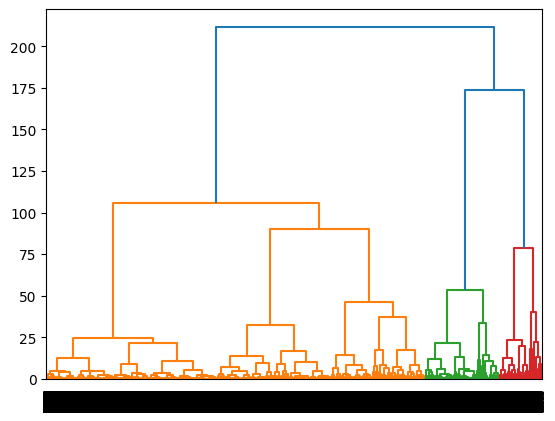

In [ ]:
dendrograma = dendrogram(linkage(X_cartao, method = 'ward'))

In [ ]:
#Analyzing dendogram we can infer the ideal number of clusters (3)
hc_cartao = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
rotulos = hc_cartao.fit_predict(X_cartao)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

## Credit card dataset

In [ ]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [ ]:
#I tested different values for the 'eps'(radius hyperparameter) - I keep the 0,37 where the -1 number of labels is minimized
dbscan_cartao = DBSCAN(eps=0.37, min_samples=5)
rotulos = dbscan_cartao.fit_predict(X_cartao)

In [ ]:
rotulos

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(rotulos, return_counts=True)

(array([-1,  0,  1,  2]), array([   52, 29920,    18,    10]))

In [ ]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color = rotulos)
grafico.show()

# K-means x Hierarchical x DBSCAN

#Choosing between clustering techniques, according to the data scatter distribution

In [ ]:
from sklearn import datasets

In [ ]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise = 0.09)

In [ ]:
X_random

array([[ 0.20131326, -0.22866468],
       [ 0.50367187,  0.83189205],
       [-0.67172055,  0.79666243],
       ...,
       [ 0.8934842 , -0.49957369],
       [ 0.13074545, -0.00506822],
       [ 0.98639659, -0.51338257]])

In [ ]:
y_random

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
np.unique(y_random)

array([0, 1])

In [ ]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
rotulos = kmeans.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
rotulos = hc.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
dbscan = DBSCAN(eps=0.1)
rotulos = dbscan.fit_predict(X_random)
grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()